<a href="https://colab.research.google.com/github/anupMahale/M4_Mini_Hackathon_Team-2/blob/main/M4_Mini_Hackathon_To_Perform_Classification_of_Coronavirus_Tweets_Anup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Embeddings using Glove6B50D

Keras LSTM model with 10 Epochs

Kaggle submission score 0.72668

# Advanced Programme in Deep Learning (Foundations and Applications)
## A Program by IISc and TalentSprint

### Mini Project Notebook: To perform text classification of coronavirus tweets during the peak Covid - 19 period using LSTMs/RNNs/CNNs/BERT.


## Learning Objectives

At the end of the mini-hackathon, you will be able to :

* perform data preprocessing/preprocess the text
* represent the text/words using the pretrained word embeddings - Word2Vec/Glove
* build the deep neural network (RNN, LSTM, GRU, CNNs, Bidirectional-LSTM, GRU, BERT) to classify the tweets


### Introduction

First we need to understand why sentiment analysis is needed for social media?

People from all around the world have been using social media more than ever. Sentiment analysis on social media data helps to understand the wider public opinion about certain topics such as movies, events, politics, sports, and more and gain valuable insights from this social data. Sentiment analysis has some powerful applications. Nowadays it is also used by some businesses to do market research and understand the customer’s experiences for their products or services.

Now an interesting question about this type of problem statement that may arise in your mind is that why sentiment analysis on COVID-19 Tweets? What is about the coronavirus tweets that would be positive? You may have heard sentiment analysis on movie or book reviews, but what is the purpose of exploring and analyzing this type of data?

The use of social media for communication during the time of crisis has increased remarkably over the recent years. As mentioned above, analyzing social media data is important as it helps understand public sentiment. During the coronavirus pandemic, many people took to social media to express their anger, grief, or sadness while some also spread happiness and positivity. People also used social media to ask their network for help related to vaccines or hospitals during this hard time. Many issues related to this pandemic can also be solved if experts considered this social data. That’s the reason why analyzing this type of data is important to understand the overall issues faced by people.



## Dataset

The given challenge is to build a multiclass classification model to predict the sentiment of Covid-19 tweets. The tweets have been pulled from Twitter and manual tagging has been done. We are given information like Location, Tweet At, Original Tweet, and Sentiment.

The training dataset consists of 36000 tweets and the testing dataset consists of 8955 tweets. There are 5 sentiments namely ‘Positive’, ‘Extremely Positive’, ‘Negative’, ‘Extremely Negative’, and ‘Neutral’ in the sentiment column.

## Description

This dataset has the following information about the user who tweeted:

1. **UserName:** twitter handler
2. **ScreenName:** a personal identifier on Twitter and is separate from the username
3. **Location:** where in the world the person tweets from
4. **TweetAt:** date of the tweet posted (DD-MM-YYYY)
5. **OriginalTweet:** the tweet itself
6. **Sentiment:** sentiment value



## Problem Statement

To build and implement a multiclass classification deep neural network model to classify between Positive/Extremely Positive/Negative/Extremely Negative/Neutral sentiments

## Grading = 10 Marks

Here is a handy link to Kaggle's competition documentation (https://www.kaggle.com/docs/competitions), which includes, among other things, instructions on submitting predictions (https://www.kaggle.com/docs/competitions#making-a-submission).

## Instructions for downloading train and test dataset from Kaggle API are as follows:

### 1. Create an API key in Kaggle.

To do this, go to the competition site on Kaggle at (https://www.kaggle.com/t/db0ea322e4b14ad1b29d14fbe406d4e5) and open your user settings page. Click Account.

* Click on your profile picture at the top-right corner of the page.

![alt text](https://i.imgur.com/kSLmEj2.png)

* In the popout menu, click the Settings option.

![alt text](https://i.imgur.com/tNi6yun.png)








### 2. Next, scroll down to the API access section and click generate to download an API key (kaggle.json).
![alt text](https://i.imgur.com/vRNBgrF.png)


### 3. Upload your kaggle.json file using the following snippet in a code cell:



In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anupmahale","key":"1b8954a26c1136ee3aac054972ebddc6"}'}

In [ ]:
#If successfully uploaded in the above step, the 'ls' command here should display the kaggle.json file.
%ls

glove.6B.50d.txt  kaggle.json  sample_data/


### 4. Install the Kaggle API using the following command


In [ ]:
!pip install -U -q kaggle==1.5.8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.8/118.8 kB 5.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentry-sdk 2.27.0 requires urllib3>=1.26.11, but you have urllib3 1.24.3 which is incompatible.
distributed 2024.12.1 requires urllib3>=1.26.5, but you have urllib3 1.24.3 which is incompatible.


### 5. Move the kaggle.json file into ~/.kaggle, which is where the API client expects your token to be located:



In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
# Execute the following command to verify whether the kaggle.json is stored in the appropriate location: ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json # run this command to ensure your Kaggle API token is secure on colab

### 6. Now download the Test Data from Kaggle

**NOTE: If you get a '404 - Not Found' error after running the cell below, it is most likely that the user (whose kaggle.json is uploaded above) has not 'accepted' the rules of the competition and therefore has 'not joined' the competition.**

If you encounter **401-unauthorised** download latest **kaggle.json** by repeating steps 1 & 2

In [ ]:
#If you get a forbidden link, you have most likely not joined the competition.
!kaggle competitions download -c perform-classification-of-coronavirus-tweets

In [ ]:
!unzip /content/perform-classification-of-coronavirus-tweets.zip

Archive:  /content/perform-classification-of-coronavirus-tweets.zip
  inflating: corona_nlp_test.csv/corona_nlp_test.csv  
  inflating: corona_nlp_train.csv/corona_nlp_train.csv  
  inflating: sample_submission.csv   


## YOUR CODING STARTS FROM HERE

## Import required packages

In [ ]:
# Import required packages
import chardet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import string
import numpy as np
from os.path import split
from copy import deepcopy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, Dropout, Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##   **Stage 1**:  Data Loading and Perform Exploratory Data Analysis (1 Points)

* Load the Dataset


In [ ]:
# Get the file encoding and use that to load the CSV to avoid encoding errors
with open('/content/corona_nlp_test.csv/corona_nlp_test.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

# Load Test Data CSV into test_data data frame
test_data = pd.read_csv('/content/corona_nlp_test.csv/corona_nlp_test.csv', encoding=encoding)

#print test_data data frame
test_data

,UserName,ScreenName,Location,TweetAt,OriginalTweet
0,1,52231,NaN,18-03-2020,One impact of #COVID19 - we're driving less. I...
1,2,62475,New York,21-03-2020,#omg ??\r\r\n\r\r\nAll my waiting was worth it...
2,3,65726,Midilli,23-03-2020,If alien anthropologists survey the archives o...
3,4,72973,"Kampala, Uganda",26-03-2020,The high prices of basic bicycles has been hig...
4,5,53157,Brookerville,18-03-2020,#coronavirus got the gas prices down too ?in J...
...,...,...,...,...,...
8950,8951,49095,NaN,16-03-2020,This guy is taking the whole #coronavirus in h...
8951,8952,67137,"Washington, D.C.",23-03-2020,States are getting thousands of consumer compl...
8952,8953,76494,Toronto,03-04-2020,Meet the man virus-proofing Canada's Walmarts\...
8953,8954,52838,"Wichita, Kansas",18-03-2020,Brad Paisley√Ç¬ís free grocery store will deli...


In [ ]:
# Get the file encoding and use that to load the CSV to avoid encoding errors
with open('/content/corona_nlp_train.csv/corona_nlp_train.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

# Load Test Data CSV into train_data data frame
training_data = pd.read_csv('/content/corona_nlp_train.csv/corona_nlp_train.csv', encoding=encoding)

#print train_data data frame
training_data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,62017,Coastal Spain,21-03-2020,Retail analyst Teresa Wickham (of Tunbridge We...,Positive
1,2,57979,NaN,20-03-2020,Prices for display panels are expected to rise...,Positive
2,3,80278,everywhere,06-04-2020,@cryptochrisw Since Covid-19 self quarantine s...,Neutral
3,4,52712,India,18-03-2020,Prices of both\r\r\nKaraknath ( ?)\r\r\nAnd Ka...,Negative
4,5,65192,Everywhere and Nowhere,22-03-2020,Now this is an interesting solution. #handsani...,Extremely Positive
...,...,...,...,...,...,...
35992,35996,58497,"Toronto, Ontario",20-03-2020,Online grocery shopping has become more like f...,Positive
35993,35997,86763,"Clarksburg, WV",11-04-2020,WVNews247: AG MORRISEY'S OFFICE has received ...,Neutral
35994,35998,46030,"Austin, TX",13-03-2020,We aren√Ç¬ít supposed to be gathering in large...,Neutral
35995,35999,71614,"Tucson, AZ",25-03-2020,For all those who know food doesn√Ç¬ít come fr...,Extremely Positive


* Check for Missing Values

In [ ]:
# Check if there are null values for any classes and count them
training_data.isnull().sum()

,0
UserName,0
ScreenName,0
Location,7564
TweetAt,0
OriginalTweet,0
Sentiment,0


* Visualize the sentiment column values


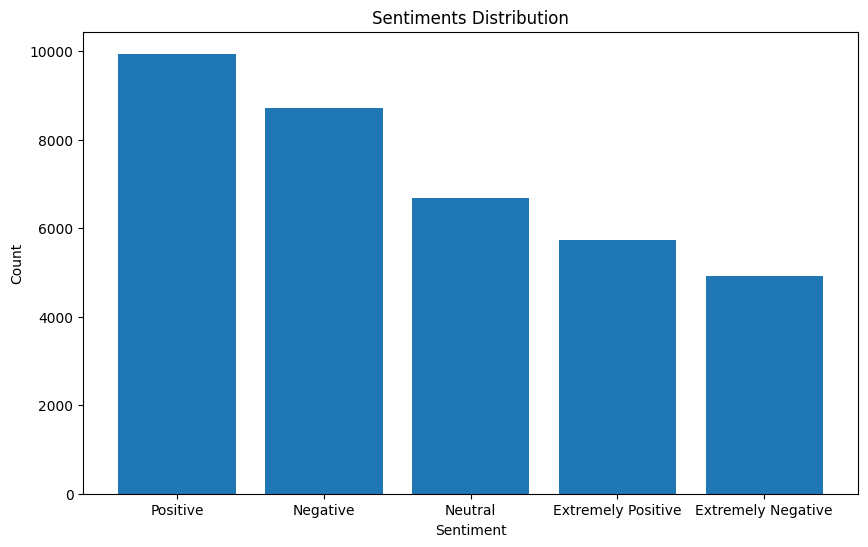

In [ ]:
# Sentiment distribution bar plot
sentiment_count = training_data['Sentiment'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(sentiment_count.index, sentiment_count.values)
plt.title('Sentiments Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

* Visualize top 10 Countries that had the highest tweets using countplot (Tweet count vs Location)


<ipython-input-13-ae9992b313b1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Location', data=training_data, order=top_10_countries.index, palette='viridis')


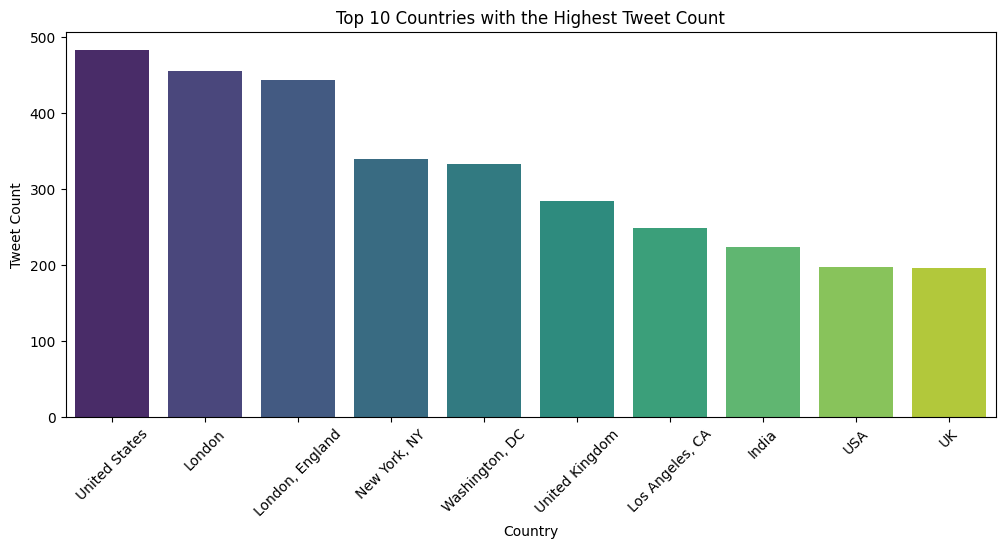

In [ ]:
# Countplot for top 10 countries with most tweets
top_10_countries = training_data['Location'].value_counts().nlargest(10)
#top_10_countries.drop('Global', inplace=True)
plt.figure(figsize=(12, 5))
sns.countplot(x='Location', data=training_data, order=top_10_countries.index, palette='viridis')
plt.title('Top 10 Countries with the Highest Tweet Count')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylabel('Tweet Count')
plt.show()

* Plotting Pie Chart for the Sentiments in percentage


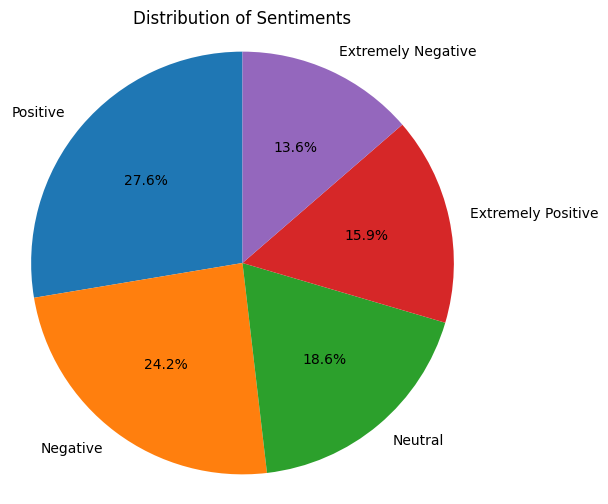

In [ ]:
# Pie chart with sentiment percentage
plt.figure(figsize=(6, 6))
plt.pie(sentiment_count, labels=sentiment_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sentiments')
plt.axis('equal')
plt.show()

* WordCloud for the Tweets/Text

    * Visualize the most commonly used words in each sentiment using wordcloud
    * Refer to the following [link](https://medium.com/analytics-vidhya/word-cloud-a-text-visualization-tool-fb7348fbf502) for Word Cloud: A Text Visualization tool




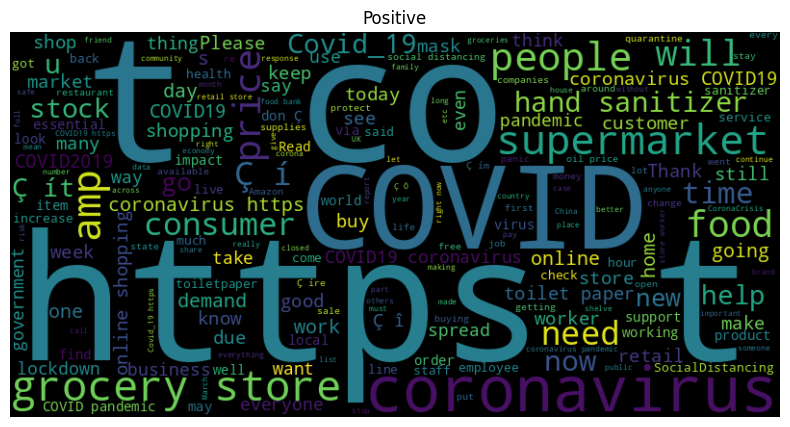

----------------------------------------------------------------------------------------------


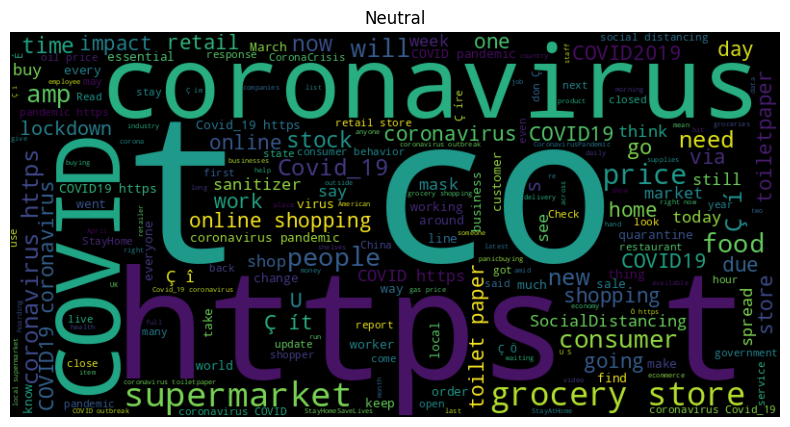

----------------------------------------------------------------------------------------------


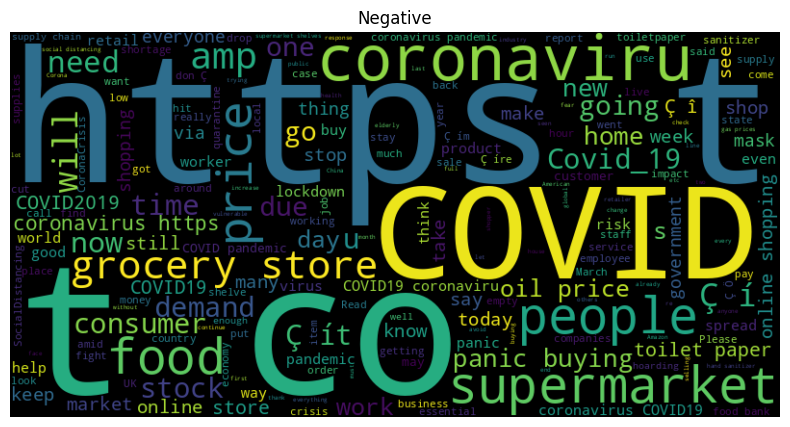

----------------------------------------------------------------------------------------------


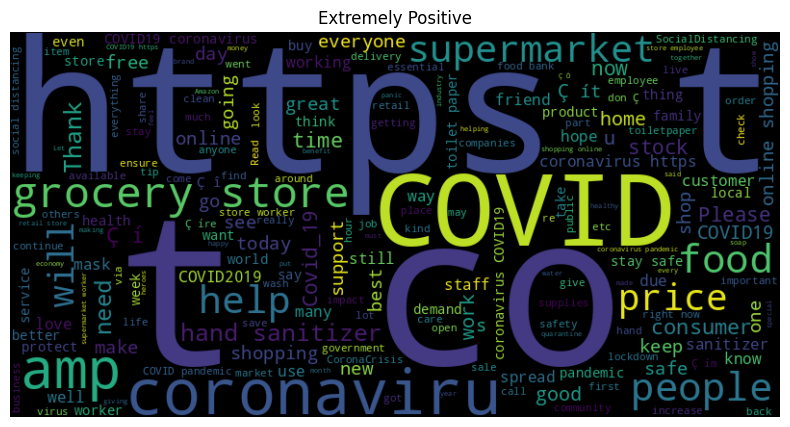

----------------------------------------------------------------------------------------------


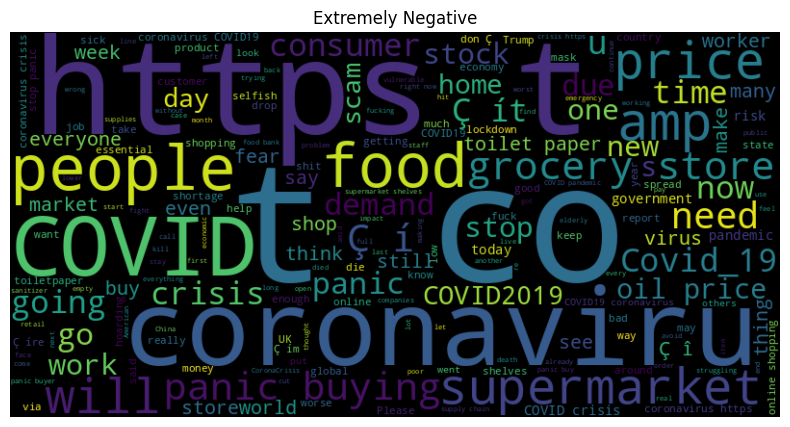

----------------------------------------------------------------------------------------------


In [ ]:
# Sentiment word cloud

for sentiment in training_data['Sentiment'].unique():
    text = ' '.join(training_data[training_data['Sentiment'] == sentiment]['OriginalTweet'])
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.title(sentiment)
    plt.show()
    print('----------------------------------------------------------------------------------------------')

##   **Stage 2**: Data Pre-Processing  (2 Points)

####  Clean and Transform the data into a specified format


In [ ]:
# Cleaning data and using TweetTokenizer to Tokenize
def preprocess_text(sen):

    sen = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", sen)
    sen = re.sub(r"\'s", " \'s", sen)
    sen = re.sub(r"[\([{})\]]", "", sen)

    # Tokenizing words using TweetTokenizer
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(sen)

    # Converting to lower case
    tokens = [w.lower() for w in tokens]

     # Remove punctuations
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]

    # Remove non alphabet
    words = [word for word in stripped if word.isalpha()]
    stop_words = set(stopwords.words('english'))

    # Remove stop words
    words = [w for w in words if not w in stop_words]

    return words

In [ ]:
preprocess_text(training_data['OriginalTweet'][3])

['prices',
 'karaknath',
 'kamalnath',
 'went',
 'due',
 'tragedies',
 'coronavirus',
 'mppoliticalcrisis']

In [ ]:
# Shufle the training dataset to prevent bias due to the original order of the training data
training_data = training_data.sample(frac=1, random_state=1)

#Reset the index col after shuffling
training_data.reset_index(drop=True, inplace=True)

# Split the training data into training and validation set
split_ratio = 0.8
split_index = int(split_ratio * len(training_data))
train_data = training_data[:split_index]
validation_data = training_data[split_index:]

len(training_data), len(validation_data)


(35997, 7200)

##   **Stage 3**: Build the Word Embeddings using pretrained Word2vec/Glove (Text Representation) (1 Point)



In [ ]:
# Function to create a Embedding Dictionary using Glove 50D
Glove_50D_Dict = {}
with open('/content/glove.6B.50d.txt', 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        Glove_50D_Dict[word] = vector

len(Glove_50D_Dict)

398998

In [ ]:
#  Function to convert Original tweet to array of vectors
def originalTweet_to_vector(originalTweet):
  tokens = preprocess_text(originalTweet)
  vectors =[]
  for word in tokens:
    if word in Glove_50D_Dict:
      vectors.append(Glove_50D_Dict[word]
                     )
  return np.array(vectors, dtype=float)

originalTweet_to_vector(training_data['OriginalTweet'][2]).shape

(15, 50)

In [ ]:
#  Function to split the dataframes into Input data (the words will be first coverted to its vector representaion) and Label data
def training_data_to_X_y(data_frame):
  X = []
  for tweet in data_frame['OriginalTweet']:
    message_as_vector = originalTweet_to_vector(tweet)
    if message_as_vector.shape[0]==0:
      message_as_vector = np.zeros((1,50))
    X.append(message_as_vector)

  # Check if Sentiment class exists. This is for the test dataframe
  if 'Sentiment' in data_frame.columns:
    y = data_frame['Sentiment'].to_numpy().astype(str)
    return X, y
  else:
    return X

In [ ]:
# Call the function to split traiing dataframe to Input X and Label y
X_training, y_training = training_data_to_X_y(training_data)

# Call the function to split validation dataframe to Input X and Label y
X_validation, y_validation = training_data_to_X_y(validation_data)

# Call the function to split test dataframe to Input X
X_test = training_data_to_X_y(test_data)

In [ ]:
# len(X_training) is total tweets in Training data
# len(X_training[i]) is number of tokens in each tweet
print(len(X_training), len(X_training[0]))
print(len(X_training), len(X_training[1]))

35997 10
35997 22


In [ ]:
# Since each tweet has different tockens, we will pad all training data with them with zero vectors as models expect all inputs of same size
#Method to add padding
def pad_X(X):
    # Get the max length among all values of X and increase my 1 just to be on safer side
    # We will use only the training data set to determine the desired_max_length for all data frames
    desired_max_length = max(len(x) for x in X_training) + 1
    desired_max_length

    # Make a copy the dataframe X to add the padded values
    X_copy = deepcopy(X)

    # Loop over the datafram and for each tweet add the zero pad based on the differnce of the desired_max_length and the lenght of the tokens for that tweet
    for i in range(len(X)):
        current_length = len(X[i])
        lenght_diff = desired_max_length - current_length
        X_copy[i] = np.pad(X[i], ((0, lenght_diff), (0, 0)), 'constant')
    return np.array(X_copy).astype(float)


In [ ]:
# Call the method to add padding for training data
X_training_padded = pad_X(X_training)

print('X_training shape before padding for the first embedding', len(X_training), len(X_training[0]), len(X_training[0][0]))
print('X_training shape after padding', X_training_padded.shape)

# Call the method to add padding for validation data
X_validation_padded = pad_X(X_validation)

print('X_validation shape before padding for the first embedding', len(X_validation), len(X_validation[0]), len(X_validation[0][0]))
print('X_validation shape after padding', X_validation_padded.shape)

# Call the method to add padding for test data
X_test_padded = pad_X(X_test)

print('X_test shape before padding for the first embedding', len(X_test), len(X_test[0]), len(X_test[0][0]))
print('X_test shape after padding', X_test_padded.shape)

X_training shape before padding for the first embedding 35997 10 50
X_training shape after padding (35997, 41, 50)
X_validation shape before padding for the first embedding 7200 14 50
X_validation shape after padding (7200, 41, 50)
X_test shape before padding for the first embedding 8955 24 50
X_test shape after padding (8955, 41, 50)


##   **Stage 4**: Build and Train the Deep Recurrent Model using Pytorch/Keras (4 Points)



In [ ]:
# Encode the input lables y_training and y_validation using one hot encoding
print(y_training)
# Convert text labels to numerical
label_encoder = LabelEncoder()
label_encoder.fit(y_training)
y_training_numerical = label_encoder.transform(y_training)
y_val_numerical = label_encoder.transform(y_validation)
num_classes = len(label_encoder.classes_)
print(num_classes)

# One-hot encode numerical labels
y_training_encoded = to_categorical(y_training_numerical, num_classes=num_classes)
y_val_encoded = to_categorical(y_val_numerical, num_classes=num_classes)
print(y_training_encoded)

['Positive' 'Negative' 'Neutral' ... 'Extremely Negative'
 'Extremely Positive' 'Negative']
5
[[0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [ ]:
# Build Recurrent Model

# Get the dimension and length of sequence
embedding_dimensions = X_training_padded.shape[-1]
max_sequence_length = X_training_padded.shape[1]

# Use the Sequential API in Keras to define your model
model = Sequential([
    Input(shape=(max_sequence_length, embedding_dimensions)),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

In [ ]:
# Compile the Model using adam algorithm.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 41, 128)        │        91,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 41, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 141,381 (552.27 KB)

 Trainable params: 141,381 (552.27 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Train model with training data
model.fit(X_training_padded, y_training_encoded,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_validation_padded, y_val_encoded))

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.3913 - loss: 1.3863 - val_accuracy: 0.4931 - val_loss: 1.1851
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.4960 - loss: 1.1783 - val_accuracy: 0.5312 - val_loss: 1.1187
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.5438 - loss: 1.0943 - val_accuracy: 0.5633 - val_loss: 1.0253
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.5744 - loss: 1.0274 - val_accuracy: 0.6106 - val_loss: 0.9486
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6075 - loss: 0.9630 - val_accuracy: 0.6381 - val_loss: 0.9023
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.6352 - loss: 0.9132 - val_accuracy: 0.6678 - val_loss: 0.8400
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.6637 - loss: 0.8583 - val_accuracy: 0.6963 - val_loss: 0.7868
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6889 - loss

In [ ]:
# Get the prediction on the training data after training for debugging
train_predictions = model.predict(X_training_padded)
train_predictions

1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


array([[1.1833746e-03, 7.1905382e-02, 3.6313526e-02, 1.9314624e-02,
        8.7128305e-01],
       [1.9798037e-03, 1.8599491e-03, 1.3878329e-01, 7.1750706e-01,
        1.3986993e-01],
       [2.3760755e-02, 7.2227907e-03, 6.0257518e-01, 1.4935574e-01,
        2.1708545e-01],
       ...,
       [4.9693123e-02, 4.2035460e-02, 4.6163207e-01, 7.3440433e-02,
        3.7319893e-01],
       [5.4631807e-04, 5.3317130e-02, 1.8227529e-02, 2.0174852e-02,
        9.0773416e-01],
       [6.4951882e-02, 6.9596490e-04, 8.5138422e-01, 5.2682437e-02,
        3.0285450e-02]], dtype=float32)

In [ ]:
# Get the max values from prediction
predicted_train_classes = np.argmax(train_predictions, axis=1)
original_train_classes = np.argmax(y_training_encoded, axis=1)

# From the max values decode the sentiments
predicted_sentiments = label_encoder.inverse_transform(predicted_train_classes)
original_sentiments = label_encoder.inverse_transform(original_train_classes)
print("Predicted sentiments (first 10):", predicted_sentiments[:10])
print("Original sentiments (first 10):", original_sentiments[:10])

Shape of training predictions: (35997, 5)
Predicted training classes (first 10): [4 3 2 2 3 1 2 4 1 2]
Original training classes (first 10): [4 2 3 2 3 1 0 4 1 2]


##   **Stage 5**: Evaluate the Model and get model predictions on the test dataset (2 Points)

* Upload the model predictions to kaggle by mapping the sentiment column vlalues from numericals the categorical







In [ ]:
# Get the prediction on the test data after training
test_predictions = model.predict(X_test_padded)

280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
# Get the max values from prediction
predicted_test_classes = np.argmax(test_predictions, axis=1)

# From the max values decode the sentiments
predicted_test_sentiments = label_encoder.inverse_transform(predicted_test_classes)

print("Predicted sentiments (first 10):", predicted_test_sentiments[:10])


Predicted sentiments (first 10): ['Positive' 'Neutral' 'Negative' 'Neutral' 'Neutral' 'Negative' 'Positive'
 'Negative' 'Positive' 'Positive']


In [ ]:
# Get the test IDs
test_ids = test_data['UserName'].tolist()

# Create a dataframe and add the Test_Id and predicted sentiment text to it
output_df = pd.DataFrame({'Test_Id': test_ids, 'Sentiment': predicted_test_sentiments})

# Write to CSV file
output_df.to_csv('sentiment_predictions.csv', index=False)

In [ ]:
#

### Instructions for preparing Kaggle competition predictions


* Get the predictions using trained model and prepare a csv file
    * DeepNet model gives output for each class, consider the maximum value among all classes as prediction using `np.argmax`.

* Predictions (csv) file should contain 2 columns as Sample_Submission.csv
  - First column is the Test_Id which is considered as index
  - Second column is prediction in decoded form (for eg. Positive, Negative etc...).